<a href="https://colab.research.google.com/github/Rithigasri/mnist-classification/blob/main/DL_EXP04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

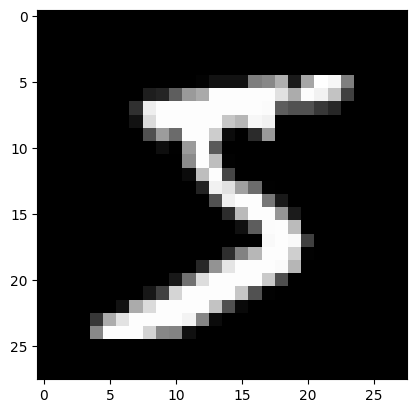

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

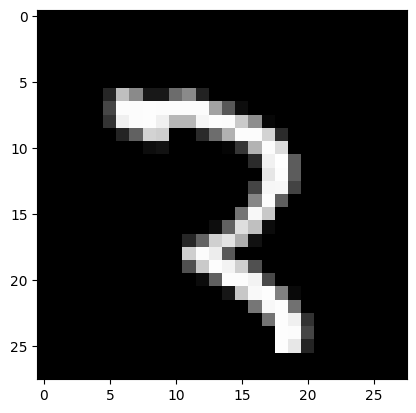

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 45s 45ms/step - loss: 0.2321 - accuracy: 0.9327 - val_loss: 0.0742 - val_accuracy: 0.9762
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0746 - accuracy: 0.9771 - val_loss: 0.0571 - val_accuracy: 0.9809
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0552 - val_accuracy: 0.9828
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0491 - val_accuracy: 0.9841
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0454 - val_accuracy: 0.9849


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()
print("Rithiga Sri.B 212221230083")

Rithiga Sri.B 212221230083


Rithiga Sri.B 212221230083


<Axes: >

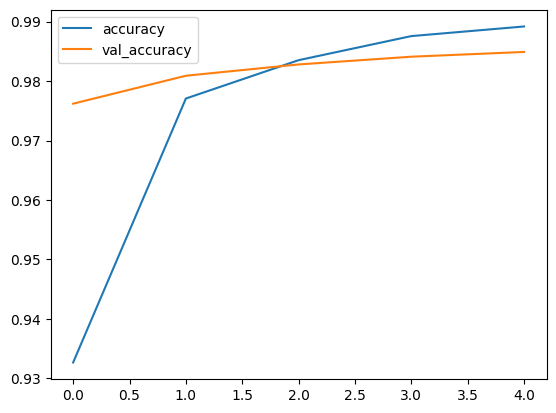

In [27]:
print("Rithiga Sri.B 212221230083")
metrics[['accuracy','val_accuracy']].plot()

Rithiga Sri.B 212221230083


<Axes: >

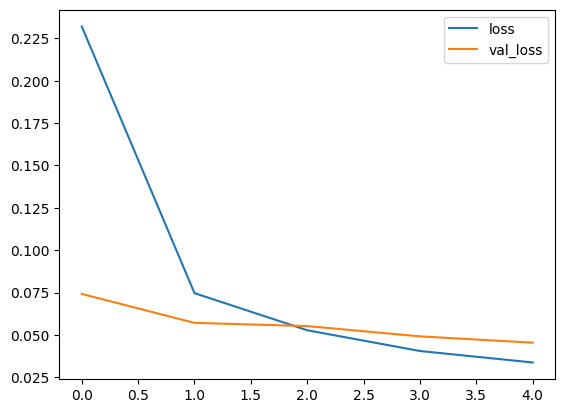

In [28]:
print("Rithiga Sri.B 212221230083")
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [30]:
print("Rithiga Sri.B 212221230083")
print(confusion_matrix(y_test,x_test_predictions))

Rithiga Sri.B 212221230083
[[ 974    0    3    0    0    2    0    1    0    0]
 [   0 1131    0    2    0    0    0    1    1    0]
 [   2    3 1016    1    1    1    0    6    2    0]
 [   0    0    2  994    0   11    0    0    2    1]
 [   0    0    2    0  972    0    1    0    1    6]
 [   1    0    0    6    0  881    3    0    1    0]
 [   6    3    3    0    3    1  938    0    4    0]
 [   1    2    9    1    1    0    0 1008    1    5]
 [   5    0    3    1    2    3    0    3  951    6]
 [   1    1    0    1    6    6    0    5    5  984]]


In [31]:
print("Rithiga Sri.B 212221230083")
print(classification_report(y_test,x_test_predictions))

Rithiga Sri.B 212221230083
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('/content/img.jpeg')

In [33]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

1/1 [==============================] - 0s 68ms/step


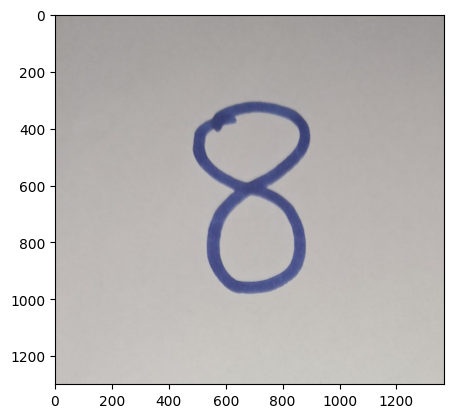

In [39]:
img = image.load_img('/content/eight.jpeg')
plt.imshow(img)
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

Rithiga Sri.B 212221230083
[8]


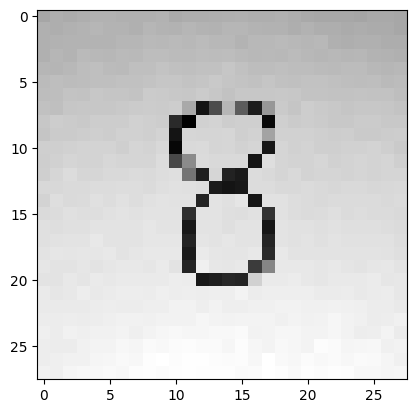

In [40]:
print("Rithiga Sri.B 212221230083")
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

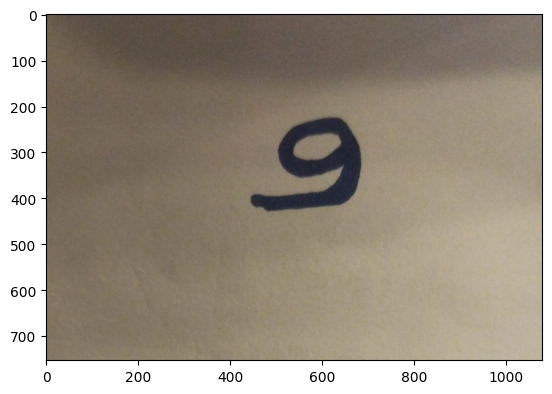

In [56]:
img1 = image.load_img('/content/img1.jpeg')
plt.imshow(img1)
img_tensor1 = tf.convert_to_tensor(np.asarray(img1))
img_28_gray1 = tf.image.resize(img_tensor1,(28,28))
img_28_gray1 = tf.image.rgb_to_grayscale(img_28_gray1)
img_28_gray_inverted1 = 255.0-img_28_gray1
img_28_gray_inverted_scaled1 = img_28_gray_inverted1.numpy()/255.0

In [57]:
x_single_prediction1 = np.argmax(model.predict(img_28_gray_inverted_scaled1.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 76ms/step


Rithiga Sri.B 212221230083
[9]


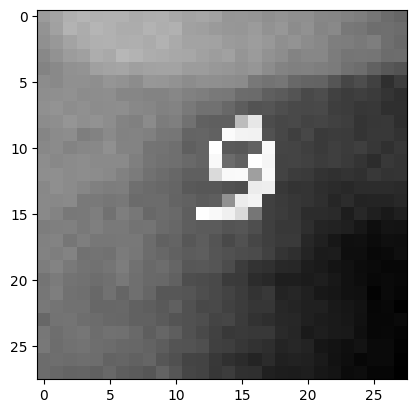

In [58]:
print("Rithiga Sri.B 212221230083")
print(x_single_prediction1)
plt.imshow(img_28_gray_inverted_scaled1.reshape(28,28),cmap='gray')